In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\HN085WS\anaconda3\envs\flaskenv\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


-> deep learning is a suitable approach aimed at measuring the financial health and performance of the analyzed sample of companies. 

-> The developed models achieved perfect classification accuracy when using the AdaBoost and Gradient-boosting algorithms. 

-> The application of a decision tree as a base learner also proved to be very appropriate. The result is a decision tree with adequate depth and very good interpretability.

Ensemble methods have been developed and studied to create a model that can accurately predict outcomes with higher precision.

Nevertheless, discriminant analysis and logistic regression are methodologies most often used in predicting a company’s financial health

 ANNs, have been widely investigated with respect to bankruptcy prediction

**Credit Risk:**

**Assessing the likelihood of loan defaults.**
**Identifying key factors contributing to creditworthiness.**

A loan is flagged as delinquent if it is either 90 days past due or it gets rated as delinquent
based on each bank’s internal rating rules

We'll be using the Boruta Algorith to reduce non relevant variables, decreasing dimensionality space


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
credit_risk= pd.read_csv("./UCI_Credit_Card.csv")
credit_risk.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
credit_risk.drop('ID',axis=1,inplace=True)

In [4]:
credit_risk.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
credit_risk.isnull().sum()>0

LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default.payment.next.month    False
dtype: bool

In [63]:
corr=credit_risk.corr()

<Figure size 20000x1800 with 0 Axes>

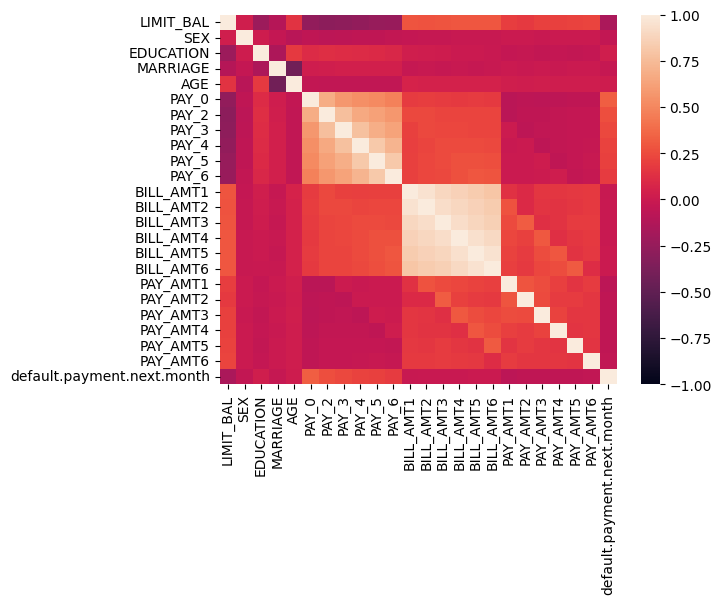

<Figure size 20000x1800 with 0 Axes>

In [64]:
sns.heatmap(corr, vmin=-1)
plt.figure(figsize=(200,18))

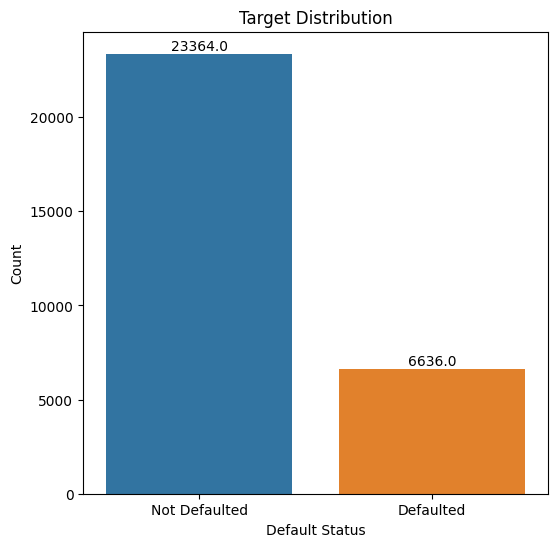

In [65]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='default.payment.next.month', data=credit_risk)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xticks([0, 1], labels=["Not Defaulted", "Defaulted"])
plt.title("Target Distribution")
plt.xlabel("Default Status")
plt.ylabel("Count")
plt.show()

/tmp/ipykernel_33/3822180897.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_risk['AGE'], kde=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


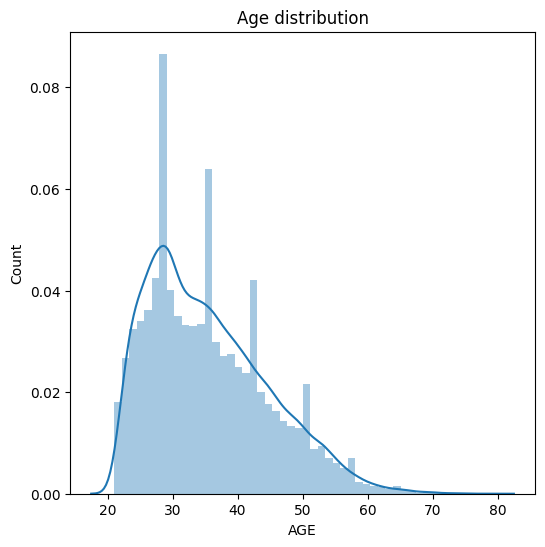

In [66]:
plt.figure(figsize=(6,6))
sns.distplot(credit_risk['AGE'], kde=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Age distribution")
plt.show()

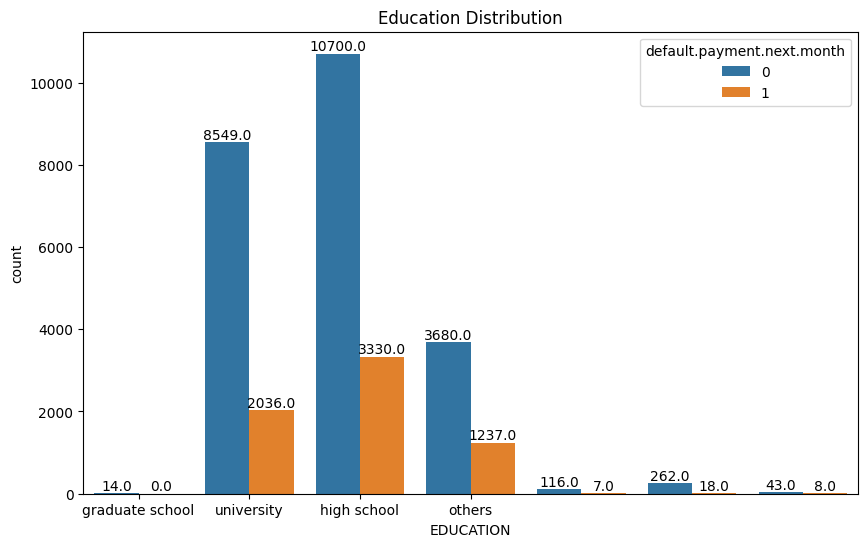

In [67]:
# (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
plt.figure(figsize=(10,6))
ax = sns.countplot(x='EDUCATION', hue='default.payment.next.month',data=credit_risk)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.xticks([0,1,2,3],labels=["graduate school", "university",'high school','others'])
plt.title("Education Distribution")
plt.show()

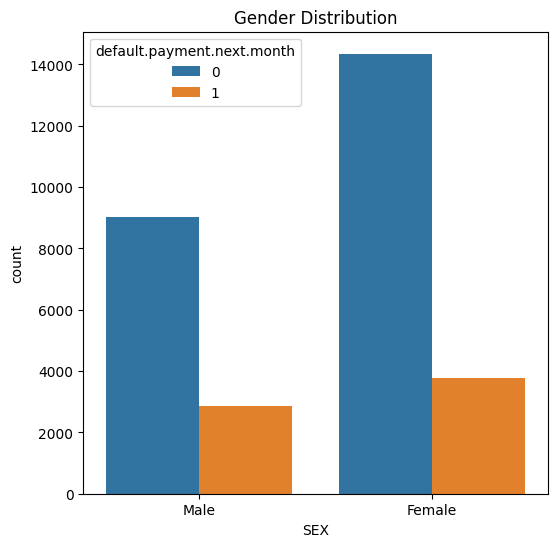

In [68]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x='SEX',hue='default.payment.next.month',data=credit_risk)
plt.xticks([0,1], labels=["Male", "Female"])
#plt.xlabel({1:'Male',2:'Female'})
plt.title("Gender Distribution")
plt.show()

In [7]:
cat_feats=['SEX', 'MARRIAGE', 'EDUCATION','default.payment.next.month']
df_cat=credit_risk[cat_feats]
df_cat

,SEX,MARRIAGE,EDUCATION,default.payment.next.month
0,2,1,2,1
1,2,2,2,1
2,2,2,2,0
3,2,1,2,0
4,1,1,2,0
...,...,...,...,...
29995,1,1,3,0
29996,1,2,3,0
29997,1,2,2,1
29998,1,1,3,1


In [8]:
df_cat['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [9]:
df_cat.loc[:, 'SEX'] = df_cat['SEX'].replace({1: 'MALE', 2: 'FEMALE'})
df_cat.loc[:, 'EDUCATION'] = df_cat['EDUCATION'].replace({1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others'})
df_cat.loc[:, 'MARRIAGE'] = df_cat['MARRIAGE'].replace({1: 'married', 2: 'single', 3: 'others'})

/tmp/ipykernel_33/1469226172.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['FEMALE' 'FEMALE' 'FEMALE' ... 'MALE' 'MALE' 'MALE']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cat.loc[:, 'SEX'] = df_cat['SEX'].replace({1: 'MALE', 2: 'FEMALE'})
/tmp/ipykernel_33/1469226172.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['university' 'university' 'university' ... 'university' 'high school'
 'university']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cat.loc[:, 'EDUCATION'] = df_cat['EDUCATION'].replace({1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others'})
/tmp/ipykernel_33/1469226172.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['married' 'single' '

In [10]:
df_cat.head()

,SEX,MARRIAGE,EDUCATION,default.payment.next.month
0,FEMALE,married,university,1
1,FEMALE,single,university,1
2,FEMALE,single,university,0
3,FEMALE,married,university,0
4,MALE,married,university,0


In [11]:
credit_risk["Defaulted"]=credit_risk["default.payment.next.month"]
credit_risk.drop("default.payment.next.month", axis=1,inplace=True)

<Axes: xlabel='Defaulted', ylabel='LIMIT_BAL'>

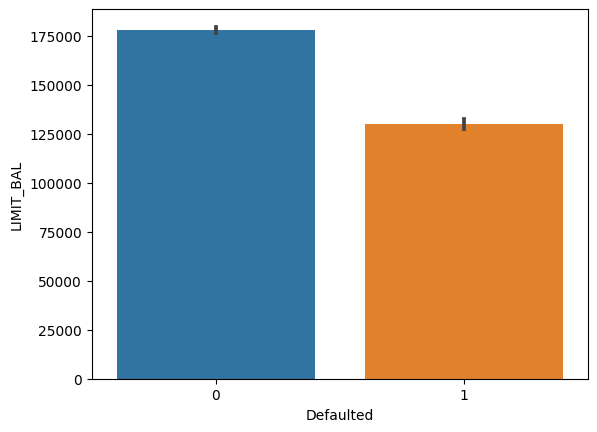

In [74]:
sns.barplot( data=credit_risk,x='Defaulted', y='LIMIT_BAL')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

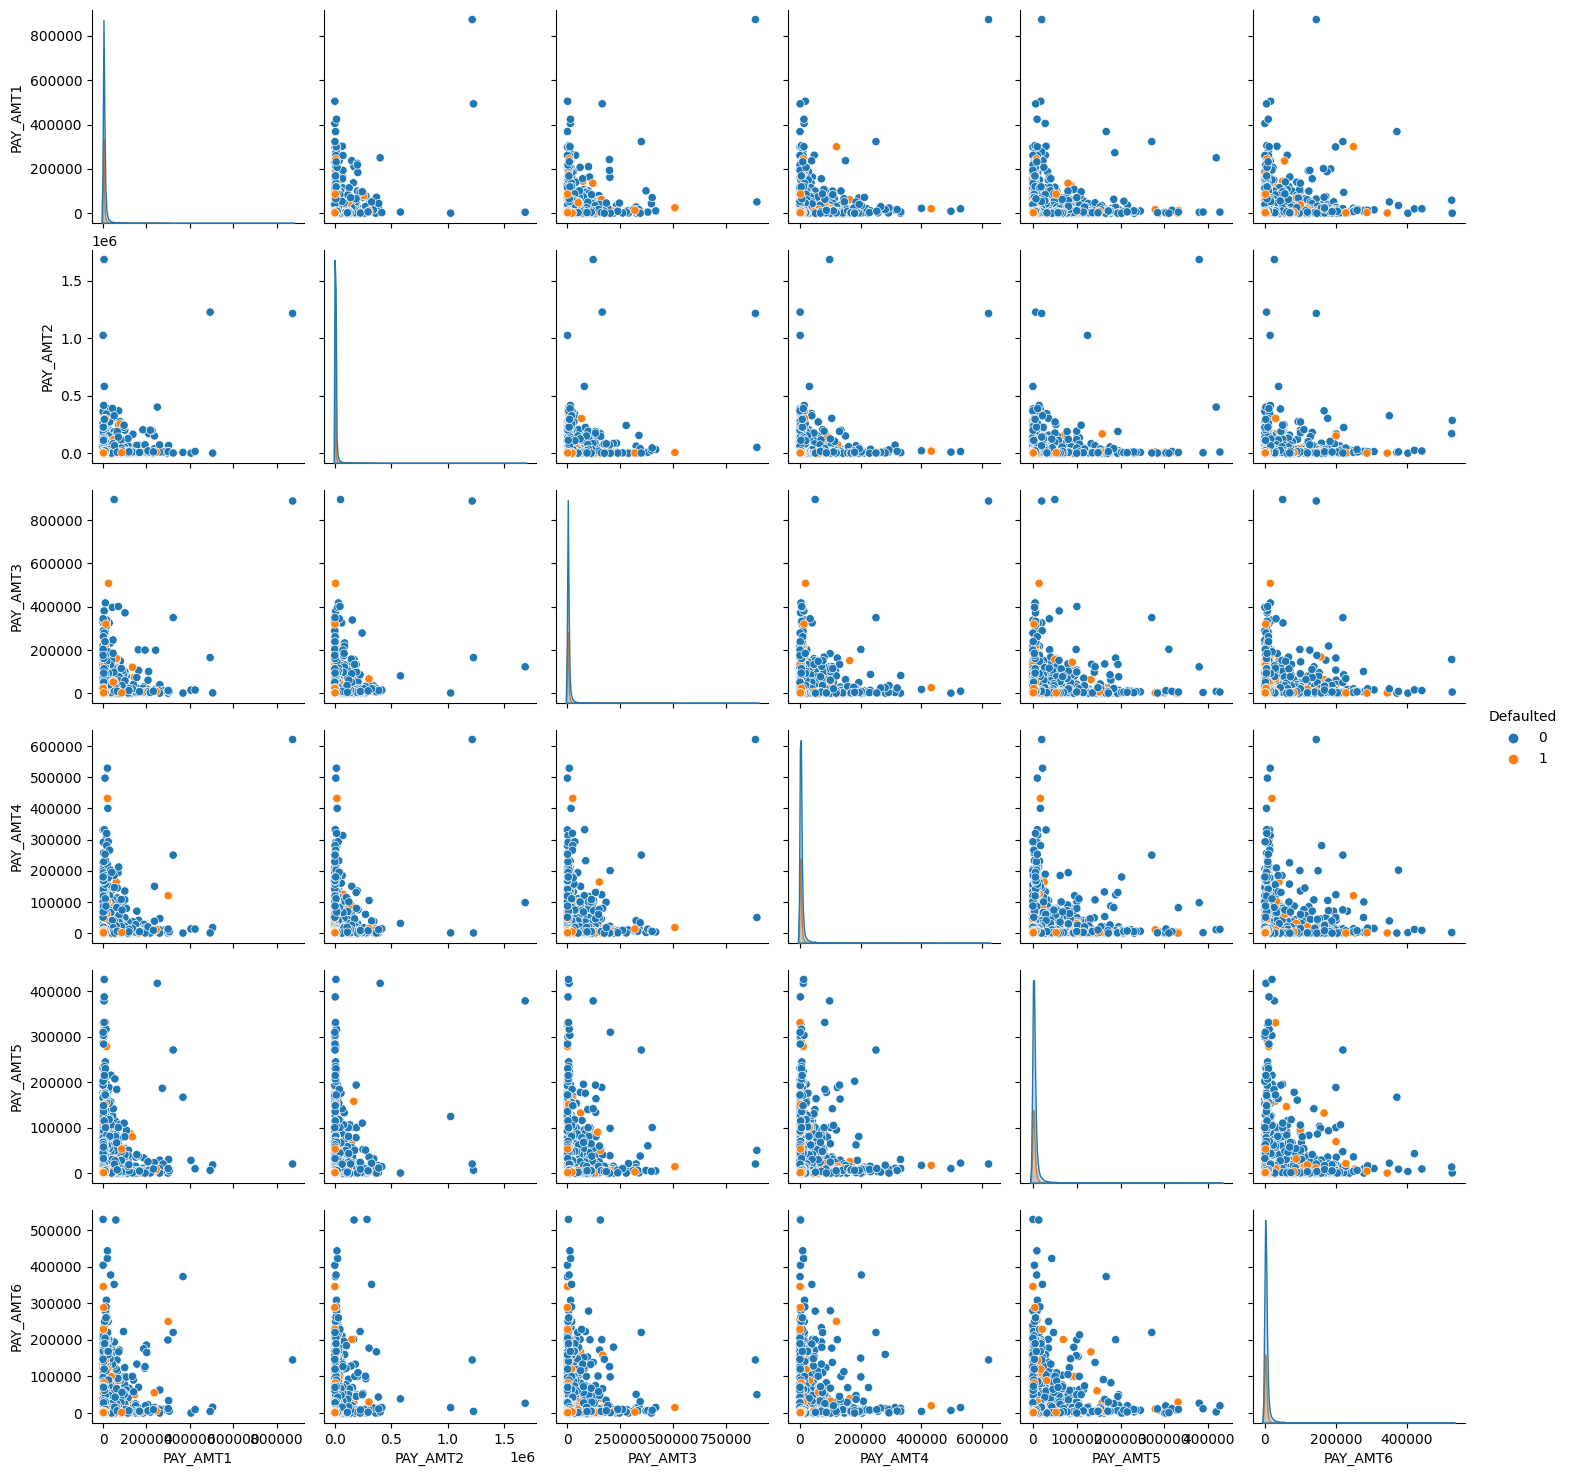

In [75]:
sns.pairplot(credit_risk[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Defaulted']], hue='Defaulted')

In [12]:
df=credit_risk

In [13]:
df['Payment_Value'] = df['PAY_AMT1'] + df['PAY_AMT2'] +  df['PAY_AMT3'] +  df['PAY_AMT4'] +  df['PAY_AMT5'] +  df['PAY_AMT6']

In [14]:
df.groupby('Defaulted')['Payment_Value'].mean()

Defaulted
0    34969.420647
1    19969.293701
Name: Payment_Value, dtype: float64

In [15]:
df['Dues'] = (df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5'])-(df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6'])

In [16]:
df.groupby('Defaulted')['Dues'].mean()

Defaulted
0    198417.218499
1    202582.226341
Name: Dues, dtype: float64

In [17]:
encoders_nums = {
                 "SEX":{1: 0, 2: 1}
}
df = df.replace(encoders_nums)

In [18]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulted,Payment_Value,Dues
0,20000.0,1,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,689.0,7015.0
1,120000.0,1,2,2,26,-1,2,0,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,5000.0,8816.0
2,90000.0,1,2,2,34,0,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,11018.0,75086.0
3,50000.0,1,2,1,37,0,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,8388.0,193399.0
4,50000.0,0,2,1,57,-1,0,-1,0,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,59049.0,31159.0


In [19]:
df.drop(['EDUCATION','MARRIAGE'],axis=1, inplace=True)

In [20]:
y = df['Defaulted']
X = df.drop(['Defaulted'], axis=1)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [23]:
#handling class imbalance
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Before oversampling: ",Counter(y_train))
SMOTE= SMOTE()
X_train,y_train= SMOTE.fit_resample(X_train,y_train)
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 18691, 1: 5309})
After oversampling:  Counter({0: 18691, 1: 18691})


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [27]:
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9991439730351506
The accuracy on test data is  0.7886666666666666


In [28]:
import xgboost as xgb

In [29]:
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [30]:
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [31]:
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:04:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [32]:
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(microseconds=592447)

In [33]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 
#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest) 

In [34]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [35]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.7968273500615269
The accuracy on test data is  0.7776666666666666


In [36]:
from xgboost import  XGBClassifier

In [37]:
dnew=df.copy()

In [38]:
X = df.drop('Defaulted',axis=1)
y = df['Defaulted']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [40]:
comp1=X_test[['Payment_Value','Dues']]
X_test.drop(['Payment_Value','Dues'], axis=1, inplace=True)
X_train.drop(['Payment_Value','Dues'], axis=1, inplace=True)

In [41]:
X_test.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
21530,60000.0,1,22,3,2,2,2,2,2,61558.0,...,59693.0,39686.0,30077.0,30761.0,10.0,3616.0,301.0,2501.0,1300.0,0.0
18768,80000.0,1,28,0,0,0,0,0,-2,58784.0,...,56626.0,56387.0,15980.0,1134.0,1970.0,2300.0,1352.0,700.0,1134.0,48.0
19462,30000.0,1,49,0,0,0,0,0,0,27922.0,...,26755.0,23235.0,25008.0,26761.0,2000.0,2000.0,2000.0,2000.0,2000.0,822.0
22634,50000.0,1,38,0,0,0,0,0,0,25184.0,...,27334.0,28374.0,28804.0,29488.0,1800.0,1800.0,1800.0,1200.0,1300.0,1300.0
17410,30000.0,1,36,0,0,0,0,0,0,11896.0,...,14073.0,15131.0,15579.0,16175.0,1600.0,1600.0,1600.0,1000.0,1000.0,1000.0


In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_b...e,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=140,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [44]:
gsearch1.best_score_

0.8218905472636816

In [45]:
gsearch1.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

In [46]:
optimal_xgb = gsearch1.best_estimator_

In [47]:
y_pred_proba = optimal_xgb.predict_proba(X_test)
y_pred_prob_default = y_pred_proba[:, 1]

In [48]:
y_pred_prob_default

array([0.7845992 , 0.0886427 , 0.15044375, ..., 0.1908475 , 0.7000079 ,
       0.07480691], dtype=float32)

In [49]:
y_pred_proba

array([[0.21540082, 0.7845992 ],
       [0.9113573 , 0.0886427 ],
       [0.84955627, 0.15044375],
       ...,
       [0.8091525 , 0.1908475 ],
       [0.29999208, 0.7000079 ],
       [0.9251931 , 0.07480691]], dtype=float32)

In [50]:
X_test['EAD'] = comp1['Dues'] - comp1['Payment_Value']

In [59]:
X_test['EAD']

21530    235525.0
18768    227978.0
19462    106490.0
22634    117557.0
17410     54069.0
           ...   
13812    656207.0
25628    -21085.0
12512    -33392.0
13962    110707.0
19702    -32601.0
Name: EAD, Length: 9900, dtype: float64

In [51]:
print(y_pred_prob_default.shape)
print(X_test['EAD'].shape)

(9900,)
(9900,)


In [52]:
estimated_loss = y_pred_prob_default * X_test['EAD']

In [53]:
estimated_loss

21530    184792.723045
18768     20208.585804
19462     16020.754686
22634     14926.477744
17410     10138.130866
             ...      
13812     47650.215512
25628     -1980.178935
12512     -6372.779759
13962     77495.776301
19702     -2438.780195
Name: EAD, Length: 9900, dtype: float64

In [56]:
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test.drop("EAD",axis=1))

In [57]:
test_class_preds

array([1, 0, 0, ..., 0, 1, 0])

In [58]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.8285572139303483
The accuracy on test data is  0.8186868686868687
